# LANGUAGE IDENTIFICATION HACKATHON

## Classification Exam

## Overview

South Africa is a multicultural society that is characterised by its rich linguistic diversity. Language is an indispensable tool that can be used to deepen democracy and also contribute to the social, cultural, intellectual, economic and political life of the South African society.

The country is multilingual with 11 official languages, each of which is guaranteed equal status. Most South Africans are multilingual and able to speak at least two or more of the official languages.

## Table of Contents<a id="content"></a>


* [1. Problem Statement](#chapter1)
    
* [2. Import Relevant packages](#chapter2)
     * [2.1 Installing packages](#section_2_1)
     * [2.2 Importing packages](#section_2_2)

* [3. Load the Data](#chapter3)

* [4. Exploratory Data Analysis (EDA)](#chapter4)
  * [4.1. Overview of the Training Dataset](#section_4_1)
  * [4.2. Analysis of the Sentimets](#section_4_2)
   * [4.2.1. Sentiment Distribution](#sub_section_4_2_1)
   * [4.2.2. Sentiment Distribution (Visual Representation)](#sub_section_4_2_2)
* [4.3. Analysis of the Message feature](#section_4_3)  
    * [4.3.1. Words Popularity](#sub_section_4_3_1)
    * [4.3.2. Number of Mention Analysis](#sub_section_4_3_2)
    * [4.3.3. Hashtags Analysis](#sub_section_4_3_3)
    * [4.3.4. Twitter Handles Analysis](#sub_section_4_3_4)
    
* [5. Clean the Data](#chapter5)
    * [5.1. Text Cleaning](#section_5_1)
    * [5.2. Drop features of Tweet ID](#section_5_2)
    * [5.3. Text Tokenization](#section_5_3)
    * [5.4. Stop words Remova](#section_5_4)
    * [5.5. Lemmatization](#section_5_5)

* [6. Modeling and Evaluation](#chapter6)


## Problem Statement

We want to identify what language a text in. We will distinguish its language amongst the 11 South African languages

## Import Relevant Packages

In [61]:
# Data loading and Text processing
import numpy as np
import pandas as pd
import re
import string
import nltk
import spacy
import urllib

#Preprocessing
from nltk.corpus import stopwords, wordnet 
from sklearn.feature_extraction.text import CountVectorizer
from nltk import tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from nltk import TreebankWordTokenizer, SnowballStemmer

# Data Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style 
sns.set(font_scale=1.5)
style.use('seaborn-colorblind')
import plotly.graph_objects as go
from wordcloud import WordCloud

# Downloads

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download(['punkt','stopwords'])
#nlp = spacy.load("en_core_web_sm")
%matplotlib inline

# Modeling and Evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Ignore warnings
import warnings
warnings.simplefilter(action='ignore')

# deployment
import pickle
from comet_ml import Experiment### 2.2 Importing Packages 

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Tshiamo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Tshiamo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Tshiamo\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Tshiamo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Tshiamo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [72]:
!pip install langdetect
!pip install nltk

- <a href="https://www.nltk.org"> nltk</a> for the advancement of natural language. It includes techniques which enable us to influence human language using python



- <a href="https://pypi.org/project/langdetect/"> langdetect</a>  was employed to identify tweets that contained words that did not belong to the target language of English. Around 55 languages are recognized by it. <br><br>


## Load Data

In [102]:
#read train data set
train_data = pd.read_csv(r"C:/Users/Tshiamo/Downloads/south-african-language-identification-hack-2022/train_set.csv")

#read test data set
test_data = pd.read_csv(r"C:/Users/Tshiamo/Downloads/south-african-language-identification-hack-2022/test_set.csv")

In [125]:
sample_submission=pd.read_csv(r"C:/Users/Tshiamo/Downloads/south-african-language-identification-hack-2022/sample_submission.csv")

## 4. Exploratory Data Analysis<a class="anchor" id="chapter4"></a>


Exploratory Data Analysis is the process of looking at sets of data to figure out what their main features are. This is often done visually. EDA is mostly used to find out what the data can tell us beyond what we can learn from formal modeling or testing of hypotheses. This way of analyzing data uses a lot of tools, most of which are graphical, to get the most out of a set of data, find the most important variables, find outliers and anomalies, and find other details that can't be seen in a DataFrame. This step is very important, especially when we are modeling the data to use techniques from Machine Learning.

### 4.1 Overview of the Training and Test Dataset <a class="anchor" id="section_4_1"></a>

In [103]:
# Brief overview of the train_data 

# Train data: 

train_data.head(12) 

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...
5,nso,dinyakišišo tše tša go dirwa gabedi ka ngwaga ...
6,tsn,kgetse nngwe le nngwe e e sa faposiwang mo tsh...
7,ven,mbadelo dze dza laelwa dzi do kwama mahatulele...
8,nso,maloko a dikhuduthamaga a ikarabela mongwe le ...
9,tsn,fa le dirisiwa lebone le tshwanetse go bontsha...


In [104]:
test_data.head(10)

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.
5,6,"Ke feela dilense tše hlakilego, tša pono e tee..."
6,7,<fn>(762010101403 AM) 1495 Final Gems Birthing...
7,8,Ntjhafatso ya konteraka ya mosebetsi: Etsa bon...
8,9,u-GEMS uhlinzeka ngezinzuzo zemithi yezifo ezi...
9,10,"So, on occasion, are statistics misused."


In [105]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


In [106]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5682 entries, 0 to 5681
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   5682 non-null   int64 
 1   text    5682 non-null   object
dtypes: int64(1), object(1)
memory usage: 88.9+ KB


From the info ,we can see that one column is an object and one is an int . we need to change or create a copy of the original test data so we can convert our int to object

#### Checking shape of test and train data

In [68]:
train_data.shape  #checking rows and columns

(33000, 2)

In [69]:
test_data.shape    # checking rows and columns

(5682, 2)

#### Checking for null values

In [70]:
train_data.isnull().sum()  # checking for nulls in train data

lang_id    0
text       0
dtype: int64

In [71]:
test_data.isnull().sum()    # checking for nulls in test data

index    0
text     0
dtype: int64

No null values for both test and train data

### Analysis of Index feature in test data

From the overview of the data carried out prior, there are two features in the test dataset; the index and text. The index is numerical, while the text is an object. The index element contains a unique value for all samples. Hence will not be very useful for modelling. It will be better off being dropped or converted to the dataset index. 

#### Drop Index feature

In [74]:
def drop_unwanted(dataframe, unwanted_features):
    df = dataframe.drop(unwanted_features,  axis='columns')
    return df

In [75]:

test_data= drop_unwanted(test_data, ['index'])

test_data.head()

,text
0,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,Tshivhumbeo tshi fana na ngano dza vhathu.
3,Kube inja nelikati betingevakala kutsi titsini...
4,Winste op buitelandse valuta.


The index feature has been dropped and we now want to add the language id feature to the test data

#### Add language feature to test dataset

In [82]:
 from langdetect import detect_langs   

In [83]:
def detect_lang(text):
   try:
       return detect(text)
   except:
       return 'unknown'


In [84]:
test_data['lang_id'] = test_data['text'].apply(detect_lang)

In [85]:
test_data.head(10)

,text,language,lang_id
0,"Mmasepala, fa maemo a a kgethegileng a letlele...",it,it
1,Uzakwaziswa ngokufaneleko nakungafuneka eminye...,NaN,sw
2,Tshivhumbeo tshi fana na ngano dza vhathu.,NaN,sw
3,Kube inja nelikati betingevakala kutsi titsini...,NaN,et
4,Winste op buitelandse valuta.,NaN,af
5,"Ke feela dilense tše hlakilego, tša pono e tee...",NaN,cy
6,<fn>(762010101403 AM) 1495 Final Gems Birthing...,NaN,en
7,Ntjhafatso ya konteraka ya mosebetsi: Etsa bon...,NaN,af
8,u-GEMS uhlinzeka ngezinzuzo zemithi yezifo ezi...,NaN,sw
9,"So, on occasion, are statistics misused.",NaN,en


In [87]:
test_data= drop_unwanted(test_data, ['language'])

test_data.head()

,text,lang_id
0,"Mmasepala, fa maemo a a kgethegileng a letlele...",it
1,Uzakwaziswa ngokufaneleko nakungafuneka eminye...,sw
2,Tshivhumbeo tshi fana na ngano dza vhathu.,sw
3,Kube inja nelikati betingevakala kutsi titsini...,et
4,Winste op buitelandse valuta.,af


### 4.2.1 Analysis of Language Id  <a class="anchor" id="sub_section_4_2_1"></a>

Checking all languages in the train data set

In [83]:
# Number of occurences for each language id .in training dataset
category_counts = train_data['lang_id'].value_counts()
category_counts


xho    3000
eng    3000
nso    3000
ven    3000
tsn    3000
nbl    3000
zul    3000
ssw    3000
tso    3000
sot    3000
afr    3000
Name: lang_id, dtype: int64

In [84]:
# Percentage distribution for each language
percentage = round(train_data['lang_id'].value_counts(normalize=True)*100,2)
percentage

xho    9.09
eng    9.09
nso    9.09
ven    9.09
tsn    9.09
nbl    9.09
zul    9.09
ssw    9.09
tso    9.09
sot    9.09
afr    9.09
Name: lang_id, dtype: float64

The train data contains 11 languages with 3000 sentences from each language. This is a very balanced dataset with no missing values, so we can say this dataset will be completely ready to be used to train a machine learning model after the noise is removed.

#### Visualization of language id 

Visualizing the balanced data set of the train data

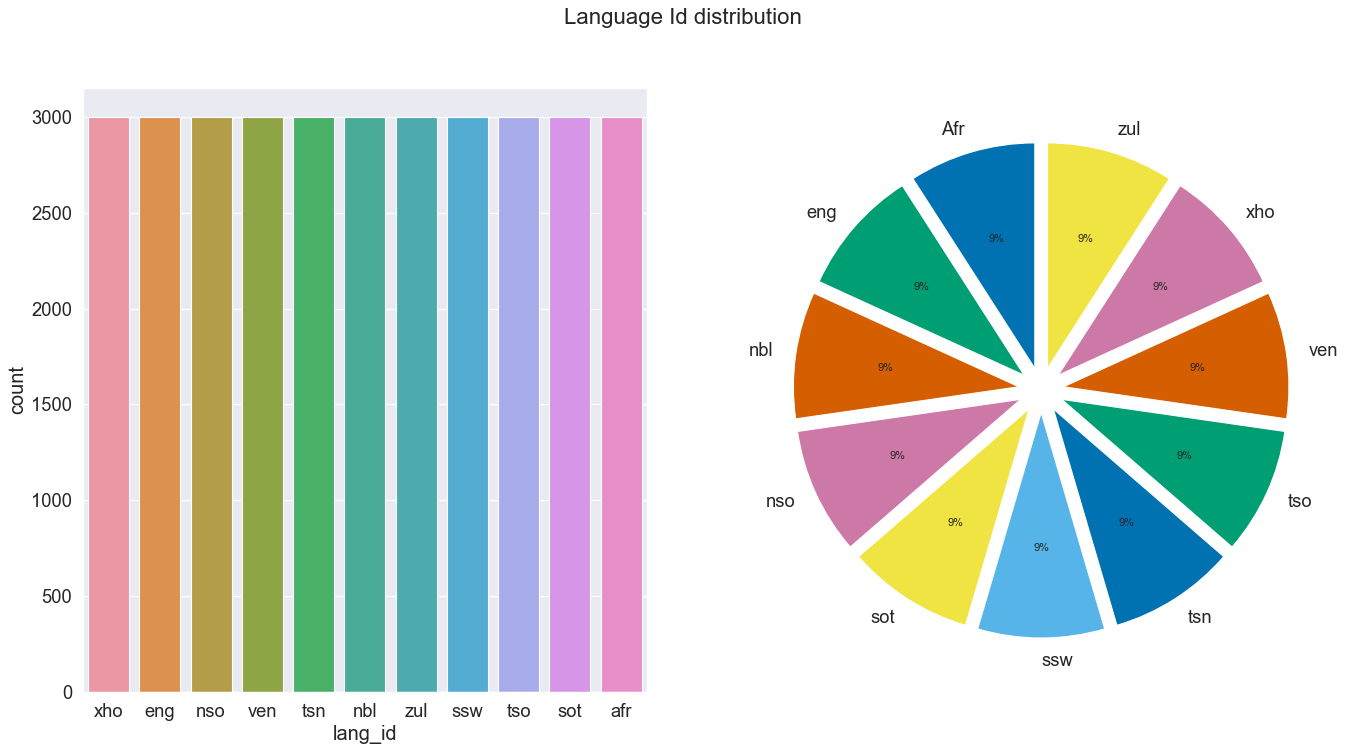

In [85]:
# Display target distribution
style.use('seaborn-colorblind')

fig, axes = plt.subplots(ncols=2, 
                         nrows=1, 
                         figsize=(20, 10), 
                         dpi=80)

sns.countplot(train_data['lang_id'], ax=axes[0])

labels=['Afr', 'eng', 'nbl', 'nso' , 'sot' , 'ssw' , 'tsn', 'tso', 'ven', 'xho' , 'zul'] 

axes[1].pie(train_data['lang_id'].value_counts(),
            labels=labels,
            autopct='%1.0f%%',
            startangle=90,
            explode = (0.1, 0.1, 0.1, 0.1,0.1,0.1, 0.1,0.1,0.1,0.1,0.1,))

fig.suptitle('Language Id distribution', fontsize=20)
plt.show()

### Observations



There are equal samples of data in all the languages, Each language id has 3000 occurances

## Data Cleaning

We want to clean the Text feature, so we remove the punctuation and convert everything to lower case

In [107]:
#View data in more depth - Use "display.max_columns" to view hidden columns in the data frame

## Train data 

print ("The shape of the train data is:" + str(train_data.shape))
pd.set_option('display.max_columns', None)
train_data.head(10)

The shape of the train data is:(33000, 2)


,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...
5,nso,dinyakišišo tše tša go dirwa gabedi ka ngwaga ...
6,tsn,kgetse nngwe le nngwe e e sa faposiwang mo tsh...
7,ven,mbadelo dze dza laelwa dzi do kwama mahatulele...
8,nso,maloko a dikhuduthamaga a ikarabela mongwe le ...
9,tsn,fa le dirisiwa lebone le tshwanetse go bontsha...


In a brief overview of the data there have been no hidden columns, and as we can see by comparing the column below to the column above that both the train data and test data shapes remain the same sizes.


## Text Cleaning

In [108]:
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [109]:
def clean_data(text):
    # change the case of all the words in the text to lowercase 
    text = text.lower()
    
    
    # remove punctuation
    text = "".join([x for x in text if x not in string.punctuation])
    
    # remove numbers
    text = re.sub("[^a-zA-Z]", " ", text)
    
   
    '''# Correct mispelt word
    spelling = SpellChecker()
    correct_text = []
    misspelt_words = spelling.unknown(text.split())
    for word in text.split():
        if word in misspelt_words:
            correct_text.append(spelling.correction(word))
        else:
            correct_text.append(word)
    text = " ".join(correct_text)'''
    
    return text

If given a row of text, the clean data function will return a string that has had all punctuation removed, as well as any capitalization and spelling errors fixed.

In [110]:
# Clean the train dataset
train_data['text'] = train_data['text'].apply(clean_data)

# Clean the test dataset
test_data['text'] = test_data['text'].apply(clean_data)

train_data.head(10)

,lang_id,text
0,xho,umgaqosiseko wenza amalungiselelo kumaziko axh...
1,xho,idha iya kuba nobulumko bokubeka umsebenzi nap...
2,eng,the province of kwazulunatal department of tra...
3,nso,o netefat a gore o ba file dilo ka moka t e le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...
5,nso,dinyaki i o t e t a go dirwa gabedi ka ngwaga ...
6,tsn,kgetse nngwe le nngwe e e sa faposiwang mo tsh...
7,ven,mbadelo dze dza laelwa dzi do kwama mahatulele...
8,nso,maloko a dikhuduthamaga a ikarabela mongwe le ...
9,tsn,fa le dirisiwa lebone le tshwanetse go bontsha...


In [111]:
test_data.head(10)

,index,text
0,1,mmasepala fa maemo a a kgethegileng a letlelel...
1,2,uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,tshivhumbeo tshi fana na ngano dza vhathu
3,4,kube inja nelikati betingevakala kutsi titsini...
4,5,winste op buitelandse valuta
5,6,ke feela dilense t e hlakilego t a pono e tee ...
6,7,fn am final gems birthing opt...
7,8,ntjhafatso ya konteraka ya mosebetsi etsa bonn...
8,9,ugems uhlinzeka ngezinzuzo zemithi yezifo ezin...
9,10,so on occasion are statistics misused


## Tokenization

In [96]:
def tokenize_data(text):
    tokenizer = tokenize.RegexpTokenizer(r'\w+')
    return tokenizer.tokenize(text)

In [97]:
# Tokenize the train dataset
#train_data['text'] = train_data['text'].apply(tokenize_data)

# Tokenize the test dataset
#test_data['text'] = test_data['text'].apply(tokenize_data)

#train_data['text'].head()

0    [umgaqosiseko, wenza, amalungiselelo, kumaziko...
1    [idha, iya, kuba, nobulumko, bokubeka, umseben...
2    [the, province, of, kwazulunatal, department, ...
3    [o, netefat, a, gore, o, ba, file, dilo, ka, m...
4    [khomishini, ya, ndinganyiso, ya, mbeu, yo, ew...
Name: text, dtype: object

##  Model Building <a class="anchor" id="section_4_3"></a>  

#### Train - Validation split

In [128]:
x = train_data["text"]
y = train_data["lang_id"]
z=test_data['text']

cv = CountVectorizer()
X = cv.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=42)
z=cv.transform(z)

In [119]:
Tk= cv.transform(test_data['text'])  #transforming test dataset

In [114]:
lm = LogisticRegression(multi_class='ovr')

In [116]:
lm.fit(X_train, y_train)

LogisticRegression(multi_class='ovr')

In [136]:
pred_lm=lm.predict(X_test)

In [118]:
# Classification report for the SVM
print(classification_report(y_test, pred_lm))



              precision    recall  f1-score   support

         afr       1.00      0.99      1.00       583
         eng       1.00      1.00      1.00       615
         nbl       0.98      0.99      0.99       583
         nso       1.00      1.00      1.00       625
         sot       1.00      1.00      1.00       618
         ssw       0.99      1.00      1.00       584
         tsn       1.00      1.00      1.00       598
         tso       1.00      1.00      1.00       561
         ven       1.00      1.00      1.00       634
         xho       0.99      0.99      0.99       609
         zul       0.98      0.98      0.98       590

    accuracy                           0.99      6600
   macro avg       0.99      0.99      0.99      6600
weighted avg       0.99      0.99      0.99      6600



In [137]:
pred_lm2=lm.predict(z)

In [ ]:
submission.head()

In [138]:
# Generate CSV for submission on Kaggle
paf = pd.DataFrame(pred_lm2, columns=['lang_id']) #Create a dataframe from the predicted values
output = pd.DataFrame({'index':test_data['index']})       #Create a dataframe from the index column from test dataset
submission5 = output.join(paf)                      #Join the two dataframes
submission5.to_csv('Tk.csv', index=False)   # Generate the csv file